## Generate 2D slices for training

The goal is to segment vessels from a large 3D light sheet image.  

One approach is to train a 2D semantic segmentation model and apply it slice by slice. 

Since a lot of my code currently is designed for 2D sequences here we extract some 2D slices from the 3D image, and save them individually so we can re-use code from other examples and also train in [Napari-easy-augment-batch-dl](https://github.com/True-North-Intelligent-Algorithms/napari-easy-augment-batch-dl)

Todo: better support for 3D in my notebooks and Napari plugin

In [3]:
import czifile
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave
import os


Open file using Napari Easy Augment Batch DL

In [4]:
parent_path = r'D:\images\tnia-python-images\imagesc'
#parent_path = r'/home/bnorthan/images/tnia-python-images/imagesc'
in_name=os.path.join(parent_path,r'2025_03_19_vessel_3D_lightsheet/data/Test lightsheet.czi')
out_path = os.path.join(parent_path,r'2025_03_28_vessel_3D_lightsheet')

if not os.path.exists(out_path):
    os.makedirs(out_path)

image = czifile.imread(in_name)

Get rid of trivial dimensions

In [5]:
print(image.shape)
image = np.squeeze(image)
print(image.shape)


(1, 1, 1, 1, 1, 1, 1, 1, 395, 3080, 2868, 1)
(395, 3080, 2868)


Take a look at a slice

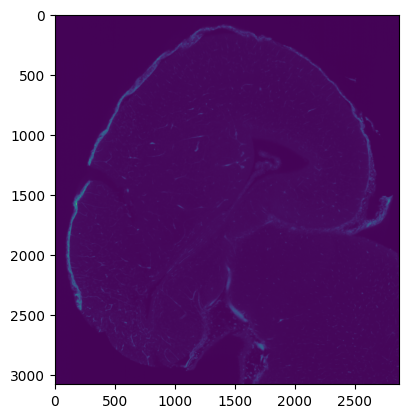

In [6]:
plt.imshow(image[200,:,:])

Define a utility function to zero pad the index (this is neeeded so the individual 2D files are ordered correctly on the file system)

In [7]:
def zero_pad(i, width=3):
    return f"{i:0{width}d}"

Write every nth slice to disk so we can train a model using Napari-easy-augment-batch-dl and related utilities (which are designed for 2D problems)

In [ ]:
from tqdm import tqdm
for i in tqdm(range(0, image.shape[0], 25)):
    image2d = image[i,:,:]
    imame = f"{out_path}/image_{zero_pad(i)}.tif"
    imsave(imame, image2d)

  0%|          | 0/16 [00:00<?, ?it/s]

c:\Users\bnort\miniconda3\envs\easy_augment_pytorch\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: D:\images\tnia-python-images\imagesc/image_000.tif is a low contrast image
  return func(*args, **kwargs)
c:\Users\bnort\miniconda3\envs\easy_augment_pytorch\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: D:\images\tnia-python-images\imagesc/image_025.tif is a low contrast image
  return func(*args, **kwargs)
 12%|█▎        | 2/16 [00:00<00:01, 12.99it/s]c:\Users\bnort\miniconda3\envs\easy_augment_pytorch\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: D:\images\tnia-python-images\imagesc/image_050.tif is a low contrast image
  return func(*args, **kwargs)
c:\Users\bnort\miniconda3\envs\easy_augment_pytorch\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: D:\images\tnia-python-images\imagesc/image_075.tif is a low contrast image
  return func(*args, **kwargs)
 25%|██▌       | 4/16 [00:00<00:00, 13.72it/s]c:\Users\bnort\miniconda3\envs\e